In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# we are trying to predict what factors are associated with higher hospital charges
import pandas as pd

medicare = pd.read_csv('Medicare_IP_Hospitals.csv')

medicare

,Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_St,Rndrng_Prvdr_City,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,Tot_Benes,...,Bene_CC_PH_Diabetes_V2_Pct,Bene_CC_PH_HF_NonIHD_V2_Pct,Bene_CC_PH_Hyperlipidemia_V2_Pct,Bene_CC_PH_Hypertension_V2_Pct,Bene_CC_PH_IschemicHeart_V2_Pct,Bene_CC_PH_Osteoporosis_V2_Pct,Bene_CC_PH_Parkinson_V2_Pct,Bene_CC_PH_Arthritis_V2_Pct,Bene_CC_PH_Stroke_TIA_V2_Pct,Bene_Avg_Risk_Scre
0,10001,Southeast Health Medical Center,1108 Ross Clark Circle,Dothan,36301,AL,1,2.0,Metropolitan area high commuting: primary flow...,3088,...,0.495790,0.438148,0.750000,0.75,0.500000,0.144430,0.027202,0.609132,0.267811,2.004865
1,10005,Marshall Medical Centers South Campus,2505 U S Highway 431 North,Boaz,35957,AL,1,4.0,Micropolitan area core: primary flow within an...,1123,...,0.433660,0.482636,0.750000,0.75,0.473731,0.166518,0.047195,0.606411,0.264470,1.723297
2,10006,North Alabama Medical Center,1701 Veterans Drive,Florence,35630,AL,1,1.0,Metropolitan area core: primary flow within an...,2634,...,0.475323,0.420273,0.750000,0.75,0.517084,0.192483,0.058466,0.651101,0.214123,1.910259
3,10007,Mizell Memorial Hospital,702 N Main St,Opp,36467,AL,1,7.0,Small town core: primary flow within an urban ...,252,...,0.507937,0.523810,0.750000,0.75,0.440476,0.111111,0.075397,0.603175,0.194444,1.935085
4,10008,Crenshaw Community Hospital,101 Hospital Circle,Luverne,36049,AL,1,3.0,Metropolitan area low commuting: primary flow ...,89,...,0.449438,0.303371,0.750000,0.75,0.426966,0.202247,0.033708,0.550562,0.179775,1.617952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,670280,North Houston Surgical Hospital Llc,20635 Kuykendahl Rd,Spring,77379,TX,48,1.0,Metropolitan area core: primary flow within an...,111,...,0.306306,0.180180,0.720721,0.75,0.297297,0.189189,0.009009,0.750000,0.117117,1.223447
3089,670285,Elite Hospital Kingwood,23330 Highway 59 N,Kingwood,77339,TX,48,1.0,Metropolitan area core: primary flow within an...,25,...,0.480000,0.400000,0.750000,0.75,0.440000,0.240000,0.000000,0.400000,0.160000,1.659607
3090,670300,Methodist Midlothian Medical Center,1201 E Highway 287,Midlothian,76065,TX,48,1.0,Metropolitan area core: primary flow within an...,339,...,0.471976,0.460177,0.750000,0.75,0.427729,0.176991,0.050147,0.572271,0.206490,1.897450
3091,670309,Texas Health Hospital Mansfield,2300 Lone Star Road,Mansfield,76063,TX,48,1.0,Metropolitan area core: primary flow within an...,197,...,0.451777,0.477157,0.750000,0.75,0.527919,0.172589,0.040609,0.553299,0.208122,2.038414


In [3]:
medicare_filtered = medicare.filter(['Tot_Submtd_Cvrd_Chrg','Tot_Mdcr_Pymt_Amt', 'Tot_Dschrgs', 'Tot_Cvrd_Days','Bene_Avg_Risk_Scre'])
medicare_filtered = medicare_filtered.dropna()
medicare_filtered = medicare_filtered.drop_duplicates()
medicare_filtered['log_Tot_Submtd_Cvrd_Chrg'] = np.log(medicare_filtered['Tot_Submtd_Cvrd_Chrg'])
medicare_filtered['log_Tot_Mdcr_Pymt_Amt'] = np.log(medicare_filtered['Tot_Mdcr_Pymt_Amt'])
medicare_filtered = medicare_filtered.drop(columns=['Tot_Submtd_Cvrd_Chrg','Tot_Mdcr_Pymt_Amt'])
medicare_filtered


,Tot_Dschrgs,Tot_Cvrd_Days,Bene_Avg_Risk_Scre,log_Tot_Submtd_Cvrd_Chrg,log_Tot_Mdcr_Pymt_Amt
0,4059,23188,2.004865,19.445024,17.745667
1,1410,7134,1.723297,17.264822,16.285637
2,3621,20645,1.910259,19.188931,17.444086
3,353,1415,1.935085,15.587201,14.993340
4,123,613,1.617952,14.733670,13.701377
...,...,...,...,...,...
3088,124,300,1.223447,17.760289,14.877389
3089,25,48,1.659607,14.804996,12.214720
3090,411,1461,1.897450,16.859766,14.978770
3091,216,679,2.038414,16.359522,14.616567


In [4]:
medicare_filtered.describe()


,Tot_Dschrgs,Tot_Cvrd_Days,Bene_Avg_Risk_Scre,log_Tot_Submtd_Cvrd_Chrg,log_Tot_Mdcr_Pymt_Amt
count,3093.000000,3093.000000,3093.000000,3093.000000,3093.000000
mean,2238.987391,11510.711284,2.022212,17.959135,16.452063
std,2567.336276,14962.756593,0.426975,1.775934,1.506359
min,11.000000,20.000000,0.626209,11.645952,10.816232
25%,474.000000,1812.000000,1.793849,16.808488,15.511076
50%,1384.000000,6472.000000,2.000495,18.217259,16.632016
75%,3097.000000,15682.000000,2.222998,19.271526,17.554336
max,32307.000000,213621.000000,4.044567,22.600118,20.565549


In [5]:
from sklearn.linear_model import LinearRegression

def medicare_lr(medicare_filtered, seed=42):
    train = medicare_filtered.sample(frac = 0.8, random_state = 42)
    test = medicare_filtered.drop(index = train.index)

    y_train = train['log_Tot_Submtd_Cvrd_Chrg']
    X_train = train.drop(columns=['log_Tot_Submtd_Cvrd_Chrg'])

    y_test = test['log_Tot_Submtd_Cvrd_Chrg']
    X_test = test.drop(columns=['log_Tot_Submtd_Cvrd_Chrg'])

    lr = LinearRegression(fit_intercept = True)
    lr.fit(X_train, y_train)

    coefs = pd.DataFrame(lr.coef_, 
                         index=lr.feature_names_in_, 
                        columns=['Coefficient vals'])
    
    coefs.loc["Train score"] = lr.score(X_train, y_train)
    coefs.loc["Test score"]  = lr.score(X_test, y_test)

    print('Train score:',lr.score(X_train, y_train))
    print('Test score:',lr.score(X_test, y_test))
    print(coefs)
   
    return lr, X_test, y_test, coefs
    
coefs = medicare_lr(medicare_filtered)





Train score: 0.9138983020763218
Test score: 0.9126709427415144
                       Coefficient vals
Tot_Dschrgs                    0.000109
Tot_Cvrd_Days                 -0.000019
Bene_Avg_Risk_Scre             0.128111
log_Tot_Mdcr_Pymt_Amt          1.110735
Train score                    0.913898
Test score                     0.912671


In [6]:
lr, X_test, y_test, coefs = medicare_lr(medicare_filtered)

Train score: 0.9138983020763218
Test score: 0.9126709427415144
                       Coefficient vals
Tot_Dschrgs                    0.000109
Tot_Cvrd_Days                 -0.000019
Bene_Avg_Risk_Scre             0.128111
log_Tot_Mdcr_Pymt_Amt          1.110735
Train score                    0.913898
Test score                     0.912671


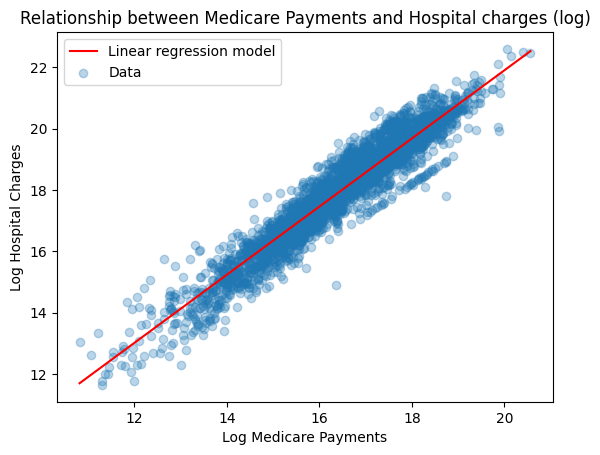

In [7]:


x_values = np.array([medicare_filtered['log_Tot_Mdcr_Pymt_Amt'].min(), medicare_filtered["log_Tot_Mdcr_Pymt_Amt"].max()])

X_line = pd.DataFrame({
    "Tot_Dschrgs": medicare_filtered["Tot_Dschrgs"].mean(),
    "Tot_Cvrd_Days": medicare_filtered["Tot_Cvrd_Days"].mean(),
    "Bene_Avg_Risk_Scre": medicare_filtered["Bene_Avg_Risk_Scre"].mean(),
    "log_Tot_Mdcr_Pymt_Amt": x_values
})

predictions = lr.predict(X_line)
fig, ax = plt.subplots(1)

#regression line
ax.plot(
    x_values,
    predictions,
    color="red",
    label="Linear regression model"
)

#actual data
ax.scatter(
    medicare_filtered["log_Tot_Mdcr_Pymt_Amt"],
    medicare_filtered["log_Tot_Submtd_Cvrd_Chrg"],
    alpha=0.3,
    label="Data"
)

ax.set(
    xlabel="Log Medicare Payments",
    ylabel="Log Hospital Charges"
)

plt.legend()
plt.title('Relationship between Medicare Payments and Hospital charges (log)')
plt.show()


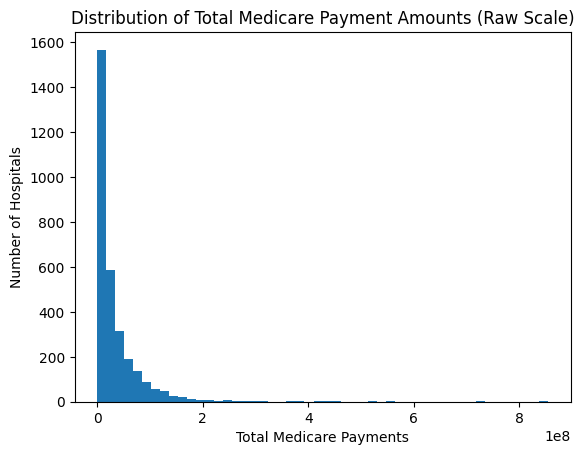

In [8]:
#histogram of Total Mdcr Pymt Amt

plt.hist(medicare['Tot_Mdcr_Pymt_Amt'], bins = 50)
plt.xlabel("Total Medicare Payments")
plt.ylabel("Number of Hospitals")
plt.title("Distribution of Total Medicare Payment Amounts (Raw Scale)")
plt.show()

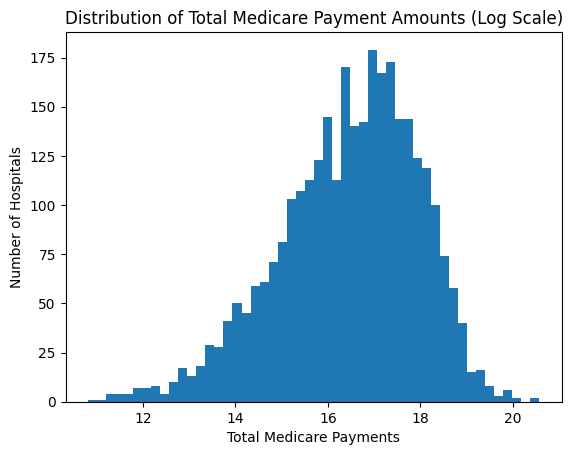

In [9]:
#logged histo for mdcr pymt amt


plt.hist(medicare_filtered['log_Tot_Mdcr_Pymt_Amt'], bins = 50)
plt.xlabel("Total Medicare Payments")
plt.ylabel("Number of Hospitals")
plt.title("Distribution of Total Medicare Payment Amounts (Log Scale)")
plt.show()

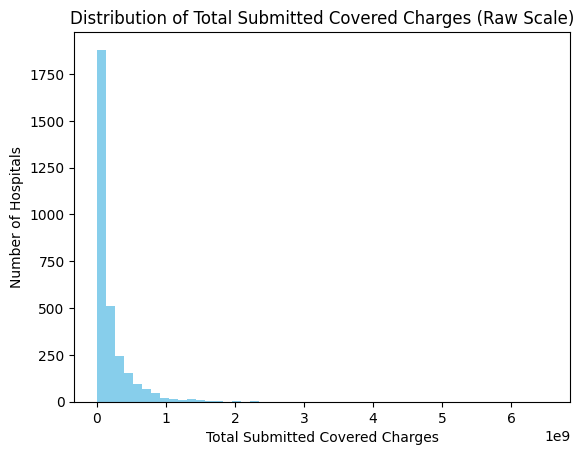

In [10]:
#total submitted covered charges raw

plt.hist(medicare['Tot_Submtd_Cvrd_Chrg'], bins = 50, color = 'skyblue')
plt.xlabel("Total Submitted Covered Charges")
plt.ylabel("Number of Hospitals")
plt.title("Distribution of Total Submitted Covered Charges (Raw Scale)")
plt.show()

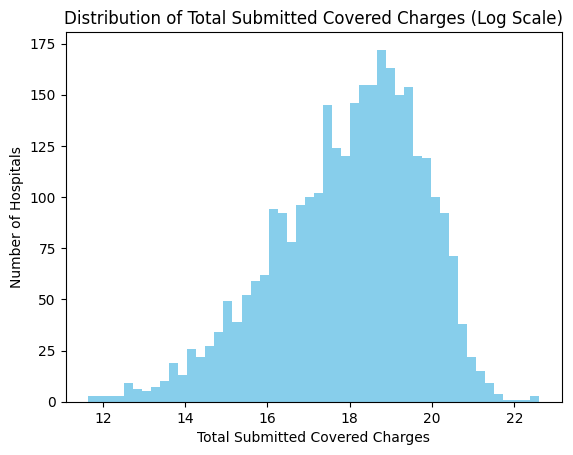

In [11]:

plt.hist(medicare_filtered['log_Tot_Submtd_Cvrd_Chrg'], bins = 50, color = 'skyblue')
plt.xlabel("Total Submitted Covered Charges")
plt.ylabel("Number of Hospitals")
plt.title("Distribution of Total Submitted Covered Charges (Log Scale)")
plt.show()